In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils.train_util import ClassicTrainer, ADGTrainer
from utils.data_util import dataset, dataset_CADG
from utils.vis_util import plot_pca_ct, plot_pca_all, plot_pca, extract_rep

data_path = 'data/'

In [2]:
CAND_COLORS = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f',
                '#ff7f00','#cab2d6','#6a3d9a', '#90ee90', '#9B870C', '#2f4554',
                '#61a0a8', '#d48265', '#c23531'])

## NN and CDGN

In [79]:
#################### Settings ##############################
num_epochs = 100
batch_size = 256
dim1 = 1136
dim2 = 100
dim_domain = 64
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
data_path = 'data/'
model_path = 'ckpts/'

d_dim = 20499
dim_label = 39
dataset_name = 'scquery'
NN_name = 'pancreas1_test_NN'
scDGN_name = 'pancreas1_test_scDGN'
id2name = {int(line.rstrip().split('-')[1]):'_'.join(line.split('-')[0].split()[1:]) for line in open('data/scquery.txt').readlines()}


#################### Settings ##############################

# prepare the dataset
d = dataset(data_path, batch_size, label_size=dim_label, dataset_name=dataset_name, validation=False)
domain_names = d.accessions_set
d_scDGN = dataset_CADG(data_path, batch_size, label_size=dim_label, model_path, dataset_name=dataset_name, validation=False)

# load the models
t_NN.dataset = d_NN
t_NN.load_model(os.path.join(model_path, NN_name,'final_model.ckpt')
t_scDGN.dataset = d_scDGN
t_scDGN.load_model(os.path.join(model_path, scDGN_name,'final_model.ckpt')

loading dataset...
loading dataset...
loading dataset: pancreas5
ClassicNN(
  (h1): Sequential(
    (0): Linear(in_features=3000, out_features=1136, bias=True)
    (1): Tanh()
  )
  (h2): Sequential(
    (0): Linear(in_features=1136, out_features=100, bias=True)
    (1): Tanh()
  )
  (o): Sequential(
    (0): Linear(in_features=100, out_features=13, bias=True)
  )
)
DANN_Siamese(
  (feature_extractor): Sequential(
    (0): Linear(in_features=3000, out_features=1136, bias=True)
    (1): Tanh()
    (2): Linear(in_features=1136, out_features=100, bias=True)
    (3): Tanh()
  )
  (domain_classifier): Sequential(
    (0): Linear(in_features=100, out_features=40, bias=True)
  )
  (label_classifier): Sequential(
    (0): Linear(in_features=100, out_features=13, bias=True)
  )
)


In [80]:
# extract the representations
NN_representations, NN_labels, NN_domains = extract_rep(t, d, scDGN=False)
scDGN_representations, scDGN_labels, scDGN_domains = extract_rep(t_scDGN, d_scDGN, scDGN=True)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

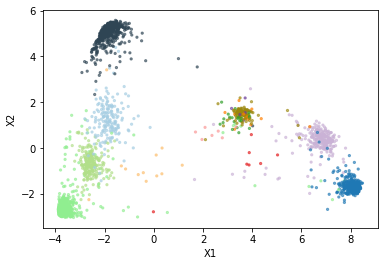

In [81]:
if not os.path.exists('eval/%s/'%dataset_name):
    os.mkdir('eval/%s/NN'%dataset_name)
    os.mkdir('eval/%s/scDGn'%dataset_name)
plot_pca(NN_representations, NN_labels, NN_domains, 'NN', expname=dataset_name)
plot_pca_ct(NN_representations, NN_labels, NN_domains, 'NN', expname=dataset_name)
plot_pca_all(NN_representations, NN_labels, NN_domains, 'NN', expname=dataset_name)
plot_pca(scDGN_representations, scDGN_labels, scDGN_domains, 'scDGN', expname=dataset_name)
plot_pca_ct(scDGN_representations, scDGN_labels, scDGN_domains, 'scDGN', expname=dataset_name)
plot_pca_all(scDGN_representations, scDGN_labels, scDGN_domains, 'scDGN', expname=dataset_name)